# 多圍標度(Multidimensional Scaling)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices

# MNIST Dataset

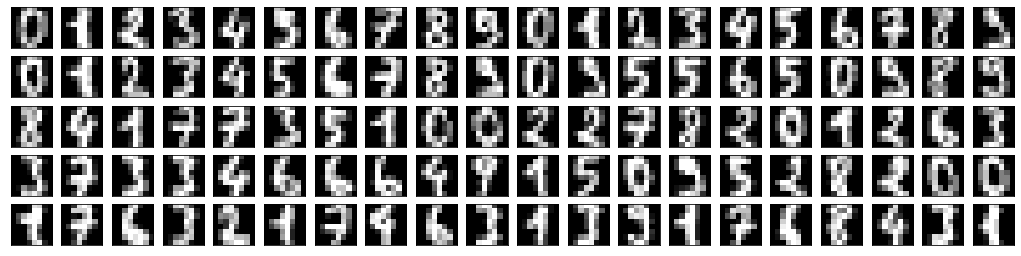

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data/16
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# MDS

In [3]:
N,M=X.shape
D=np.sum((X[None,:,:]-X[:,None,:])**2,axis=2)
C=np.diag(np.ones(N))-np.outer(np.ones(N),np.ones(N))/N
B=np.dot(np.dot(C,D),C)
A,V=np.linalg.eig(B)
idx=np.argsort(A)
X_sub=np.dot(V[:,idx[:2]],np.diag(A[idx[:2]]))

# Plot

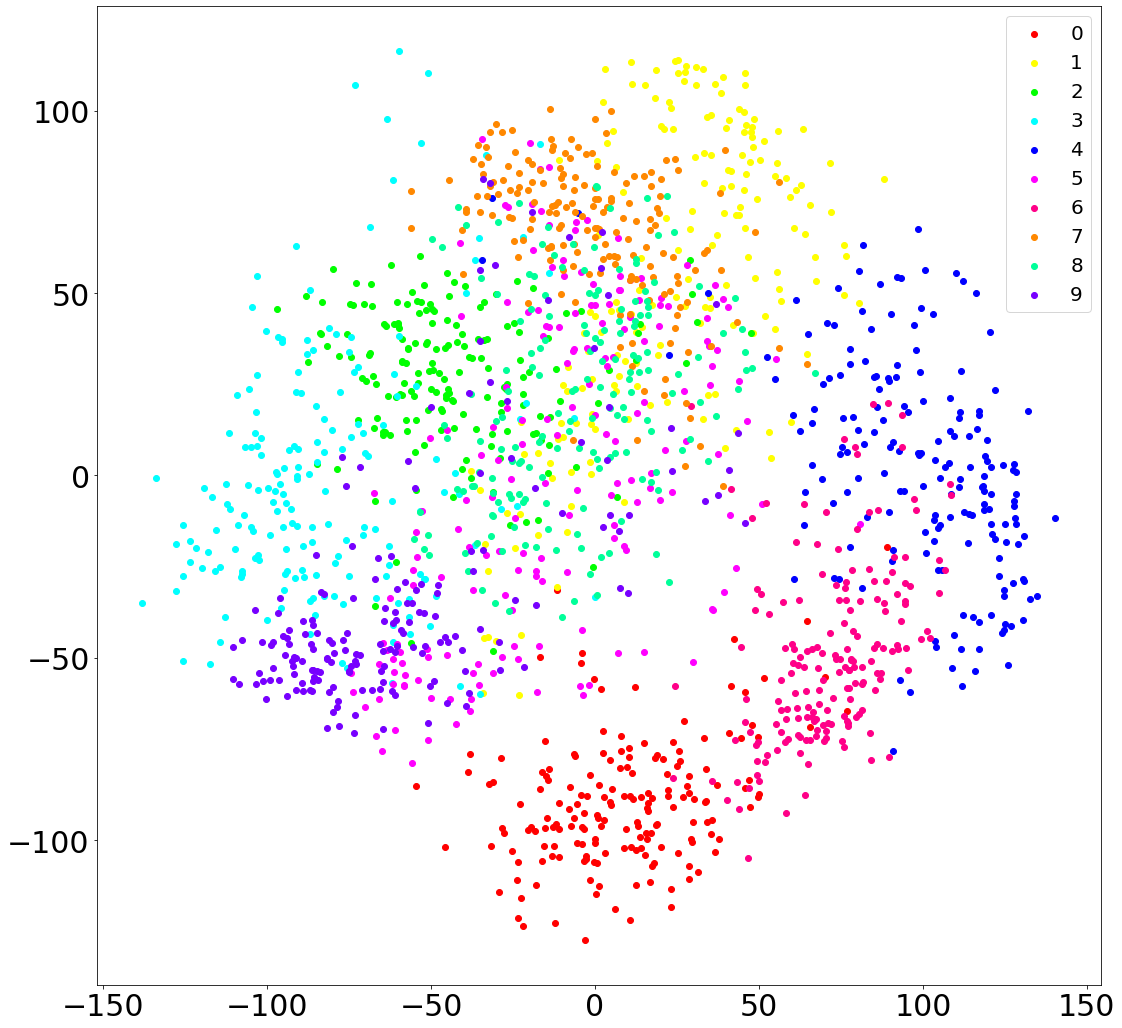

In [5]:
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,10):
    BOOL=(y==i)
    plt.scatter(X_sub[BOOL,0],X_sub[BOOL,1],c=color[i],label=i)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)
plt.show()